Importing Necessary Libraries:

In [58]:
import pandas as pd
import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Loading the Data:

In [59]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv", header=None,names=col_names)

In [60]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.shape

(768, 9)

## Feature Selection:

In [62]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = df[feature_cols]
Y = df.label

## Splitting the Data:

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

## Building Decision Tree Model:

In [64]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

## Evaluating Model:

In [65]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[113  33]
 [ 44  41]]
             precision    recall  f1-score   support

          0       0.72      0.77      0.75       146
          1       0.55      0.48      0.52        85

avg / total       0.66      0.67      0.66       231

0.6666666666666666


## Visualizing Decision Tress

In [66]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

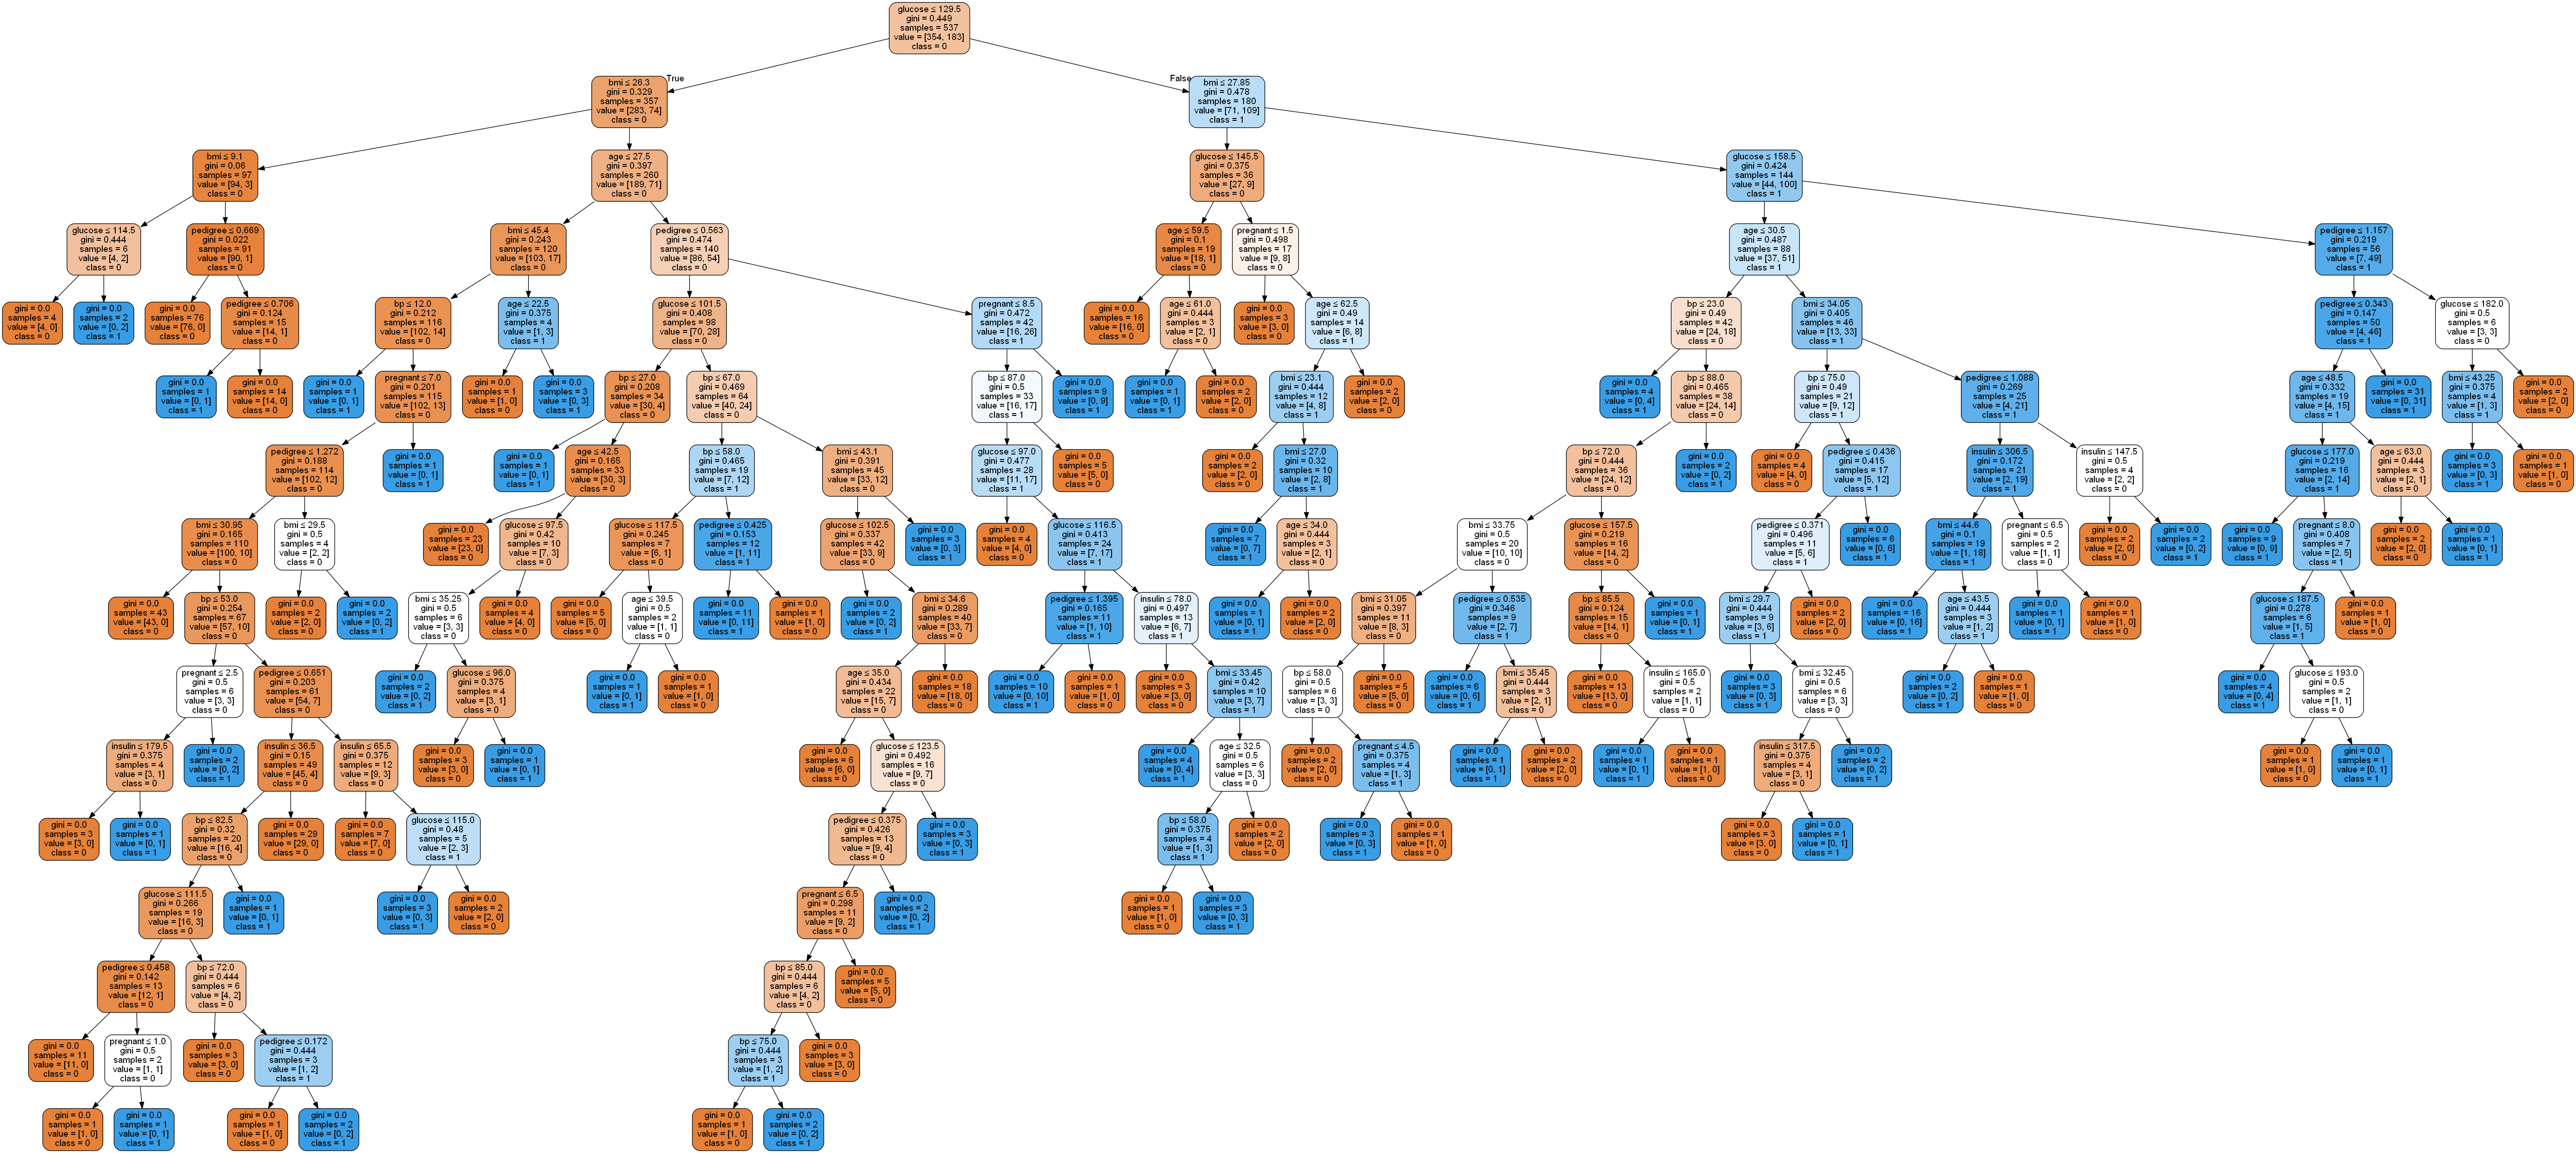

In [67]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Optimizing Decision Tree Performance (Parameter Tuning) 

### The parameters in Decision Tree are:
#### Criterion: 
This parameter allows us to use the different-different attribute selection measure.
- default='gini' for the Gini Index
- supports entropy for Information Gain

#### Splitter:
This parameter allows us to choose the split strategy. 
- supprots "best" to choose the best split
- supports "random"to choose the best random split

#### max_depth :
The maximum depth of the tree. 
- default = 'None', then nodes are expanded until all the leaves contain less than min_samples_split samples.


In [68]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(accuracy_score(Y_test, y_pred))

[[124  22]
 [ 31  54]]
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       146
          1       0.71      0.64      0.67        85

avg / total       0.77      0.77      0.77       231

0.7705627705627706


## Visualizing Decision Tress (after Parameter Tuning)

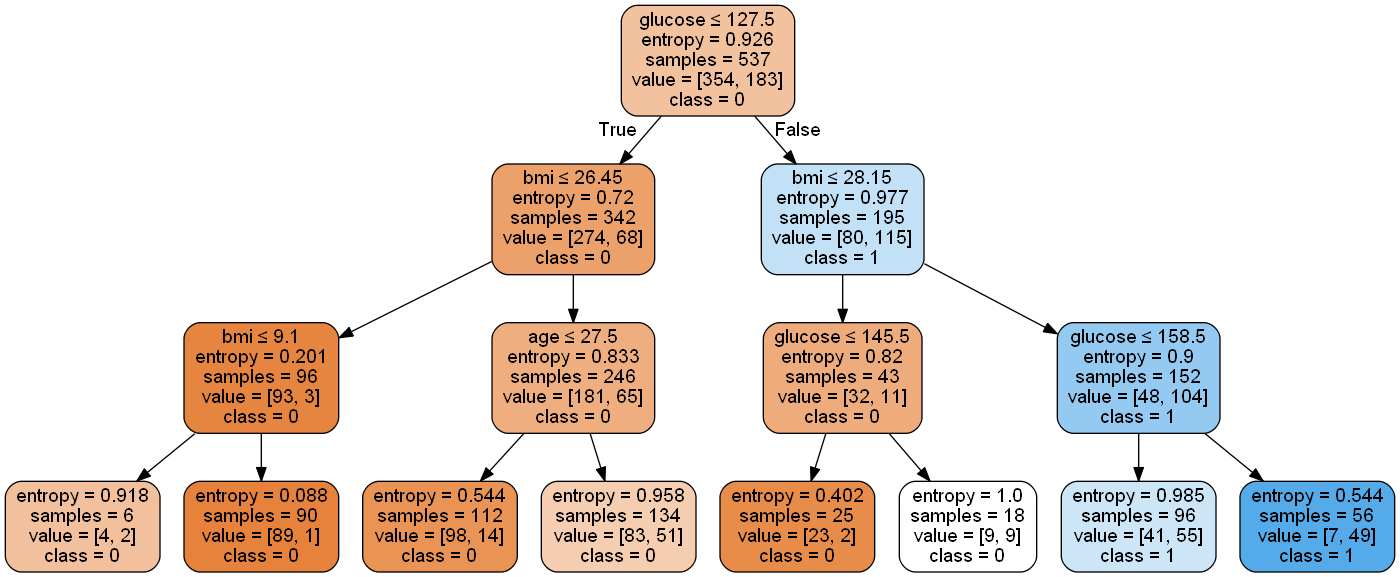

In [71]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())